In [77]:
import pandas as pd
import numpy as np
import scanpy as sc
%matplotlib inline
from matplotlib import pyplot as plt
import Levenshtein
import matplotlib as mpl
import seaborn as sns
import autoreload
import scipy
params = {
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 10,
    'font.family': "Helvetica",
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 100
   }

mpl.rcParams.update(params)

sns.set_style("ticks")
sns.set_context(context='paper')
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0, "transparent": False}
mpl.rc('savefig', dpi=300)
output_dir='../../figures/'
output_suffix = ""
output_formats = [".png", ".pdf"]

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20) 
pd.set_option('display.width', 100)

def tissue_colors():
    
    tissue_color_dict = {'Bladder': '#e7969c',
             'Blood': '#d6616b',
             'Bone_Marrow': '#cedb9c',
             'Eye': '#c7ea46',#"#00ff7f",
             'Fat': '#e7cb94',
             'Heart': '#ff0800',
             'Kidney': '#7b4173',
             'Large_Intestine': '#31a354',
             'Liver': '#000080',
             'Lung': '#3182bd',
             'Lymph_Node': '#8c6d31',
             'Mammary':'#ce6dbd',
             'Muscle': '#e7ba52',
             'Pancreas': '#fd8d3c',
             'Prostate':'#637939',#'#a55194',#
             'Salivary_Gland':'#622a0f',
             'Skin': '#de9ed6',
             'Small_Intestine': '#6baed6',
             'Spleen': '#393b79',
             'Thymus': '#9c9ede',
             'Tongue':'#b5cf6b',
             'Trachea': '#969696',
             'Uterus':'#c64b8c',#'#ff0090',
             'Vasculature': '#843c39'}
    return tissue_color_dict




/home/michaelswift/miniconda3/envs/scirpy/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (93,94,111) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [78]:
# load data 
airr = pd.read_table('../../data/merged_airr.tsv')
met = pd.read_csv('../../data/TSP1_TSP15_metadata.csv')


/home/michaelswift/miniconda3/envs/scirpy/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (10,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [91]:
# check how many merged IGH assemblies
print("{} {}".format("IGH assemblies merged", airr[airr.locus.str.contains('IGH')].shape[0]))
print("{} {}".format("IGL/K assemblies merged", airr[airr.locus.str.contains('IGK|IGL')].shape[0]))

#ig.tissue.value_counts()

IGH assemblies merged 602
IGL/K assemblies merged 810


In [92]:
ig = airr[airr.locus.str.contains('IG')]

In [93]:
def calculate_v_mu_freq(df):
    df['distance_to_germline_v'] = df.apply(lambda x: Levenshtein.distance(x.v_sequence_alignment, x.v_germline_alignment), axis=1)


    df['v_mu_freq'] = df['distance_to_germline_v'] / df['v_sequence_alignment'].str.len()
    return df

igh = calculate_v_mu_freq(ig)

<ipython-input-93-de4e25ae2bd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_germline_v'] = df.apply(lambda x: Levenshtein.distance(x.v_sequence_alignment, x.v_germline_alignment), axis=1)
<ipython-input-93-de4e25ae2bd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v_mu_freq'] = df['distance_to_germline_v'] / df['v_sequence_alignment'].str.len()


In [95]:
color_dict = tissue_colors()

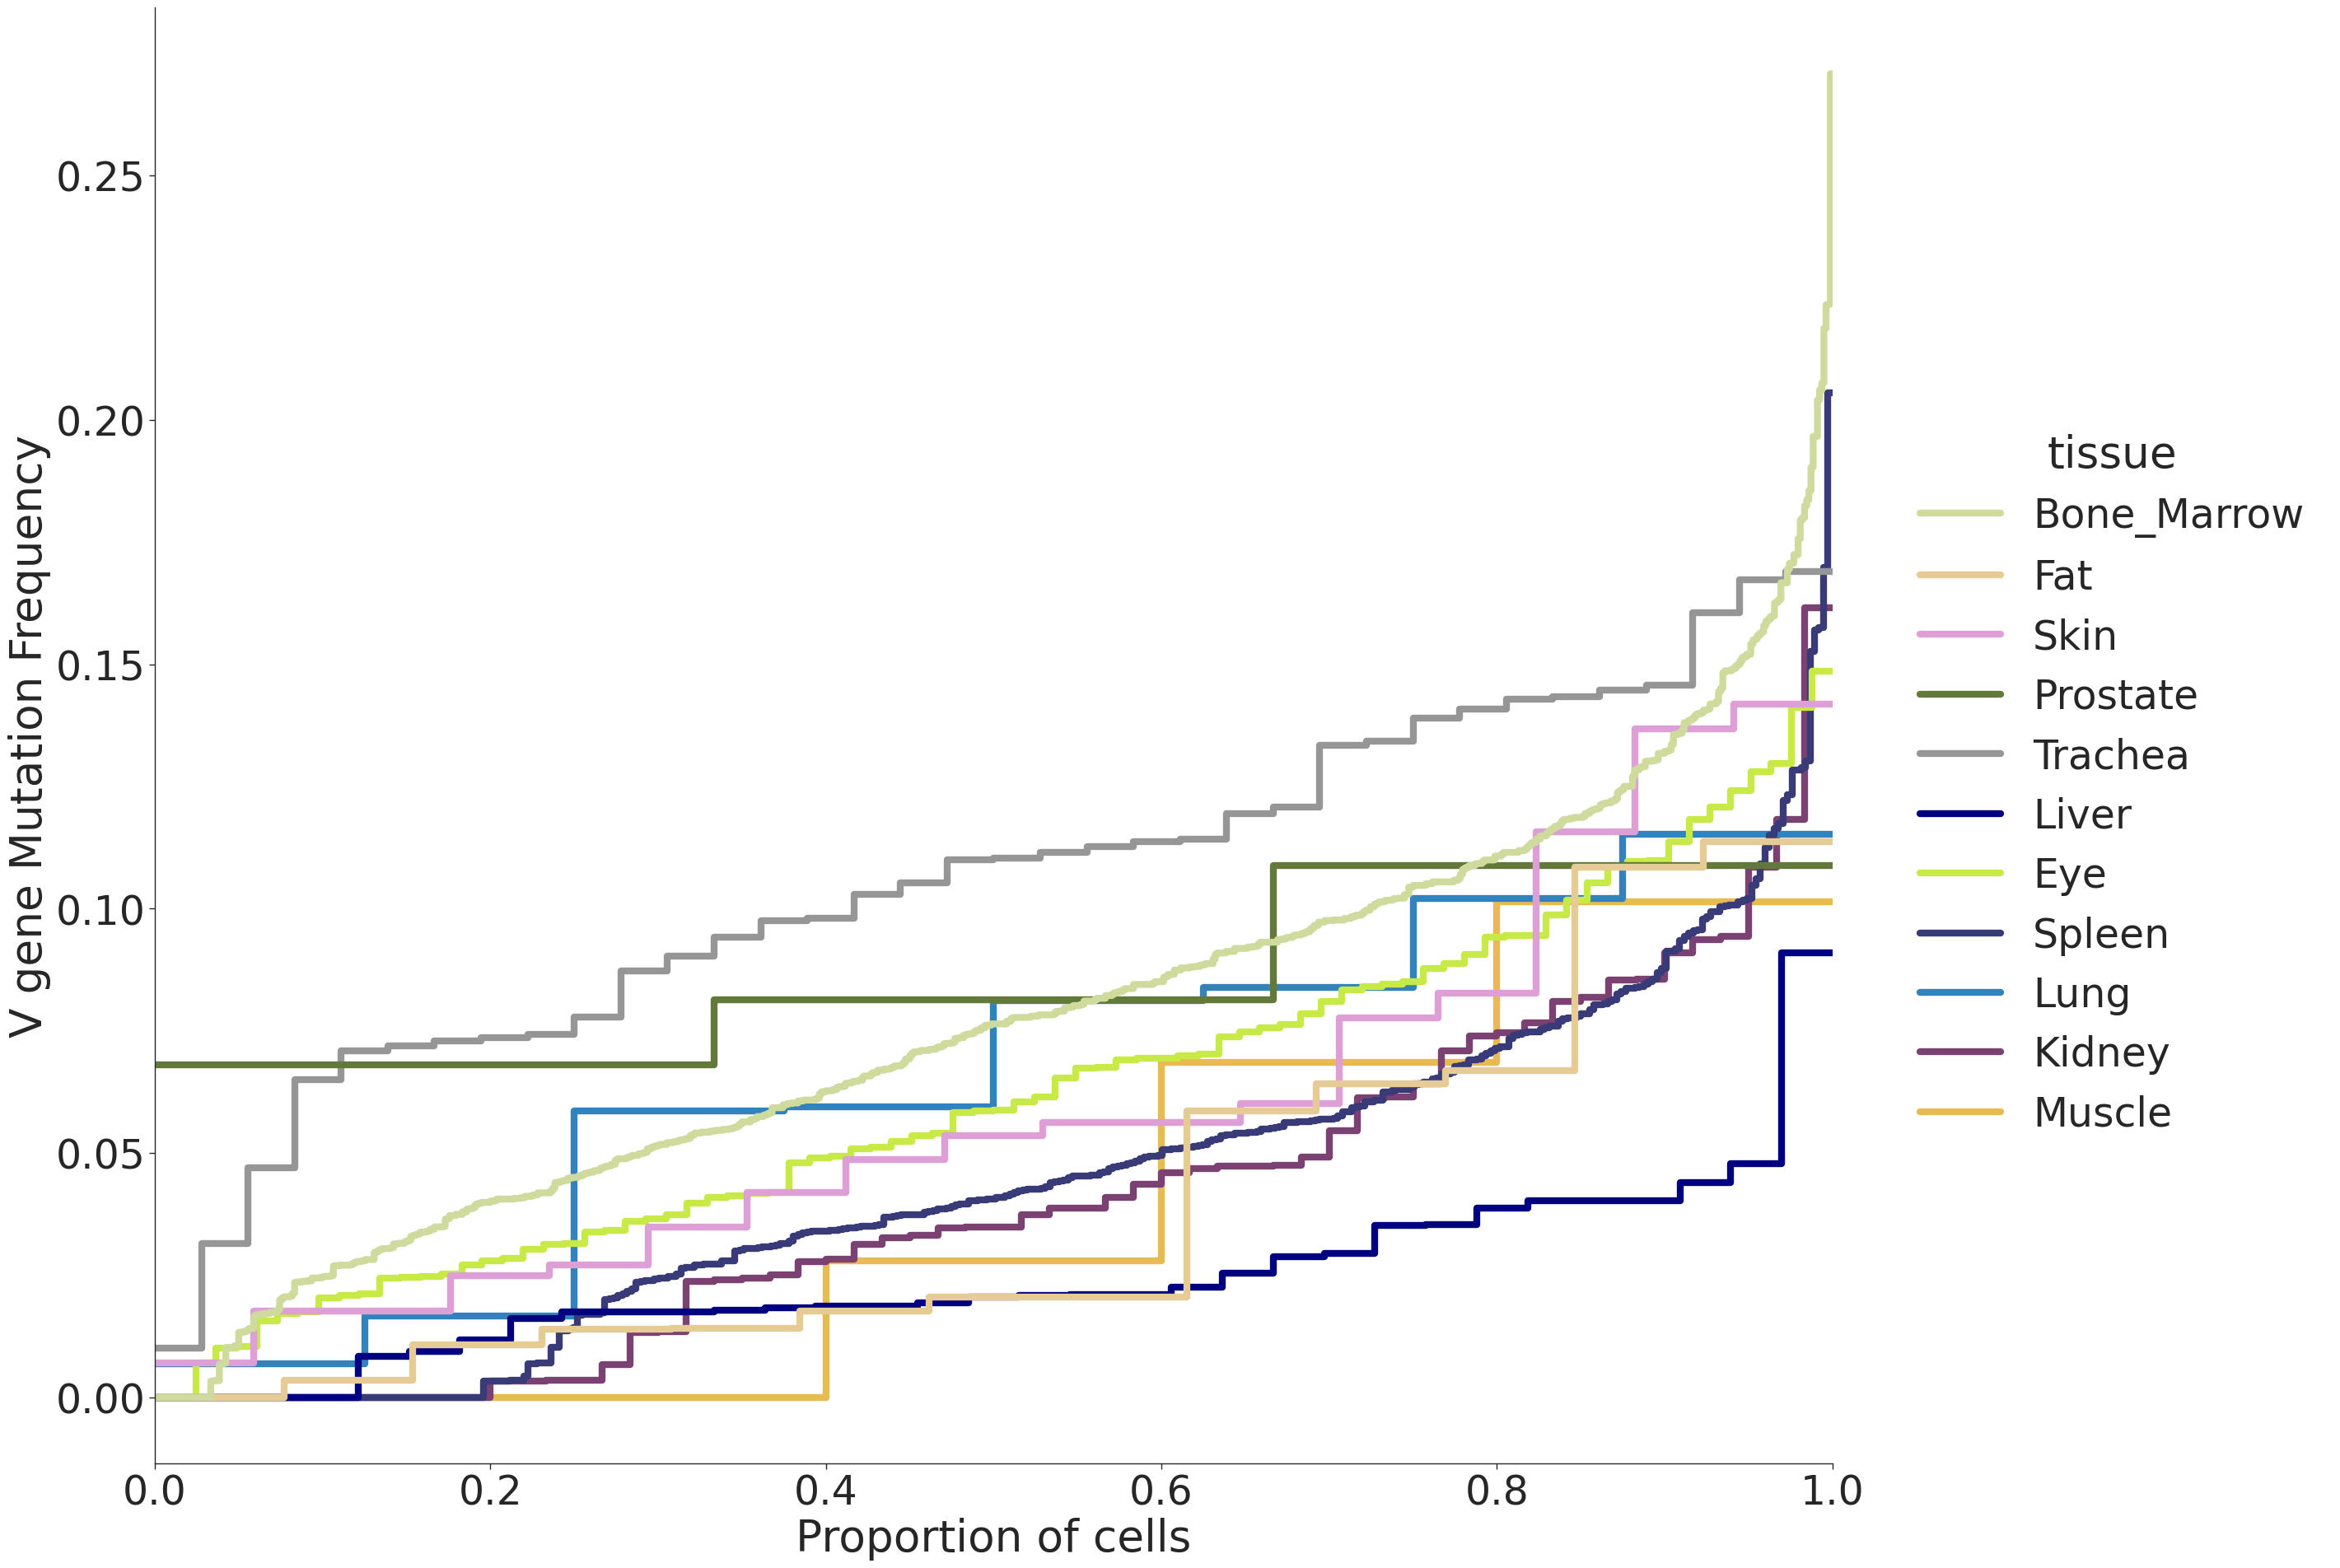

In [98]:
sns.set_context("paper", font_scale=4, rc={"lines.linewidth":6})
hue = 'tissue'
kind = 'ecdf'
x = 'v_mu_freq'
sel = igh_filtered[hue].value_counts() > 2
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]

g = sns.displot(data, y = data[x], kind=kind, hue=hue, palette=tissue_colors(), height=20, aspect=1.2)

g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))
g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')


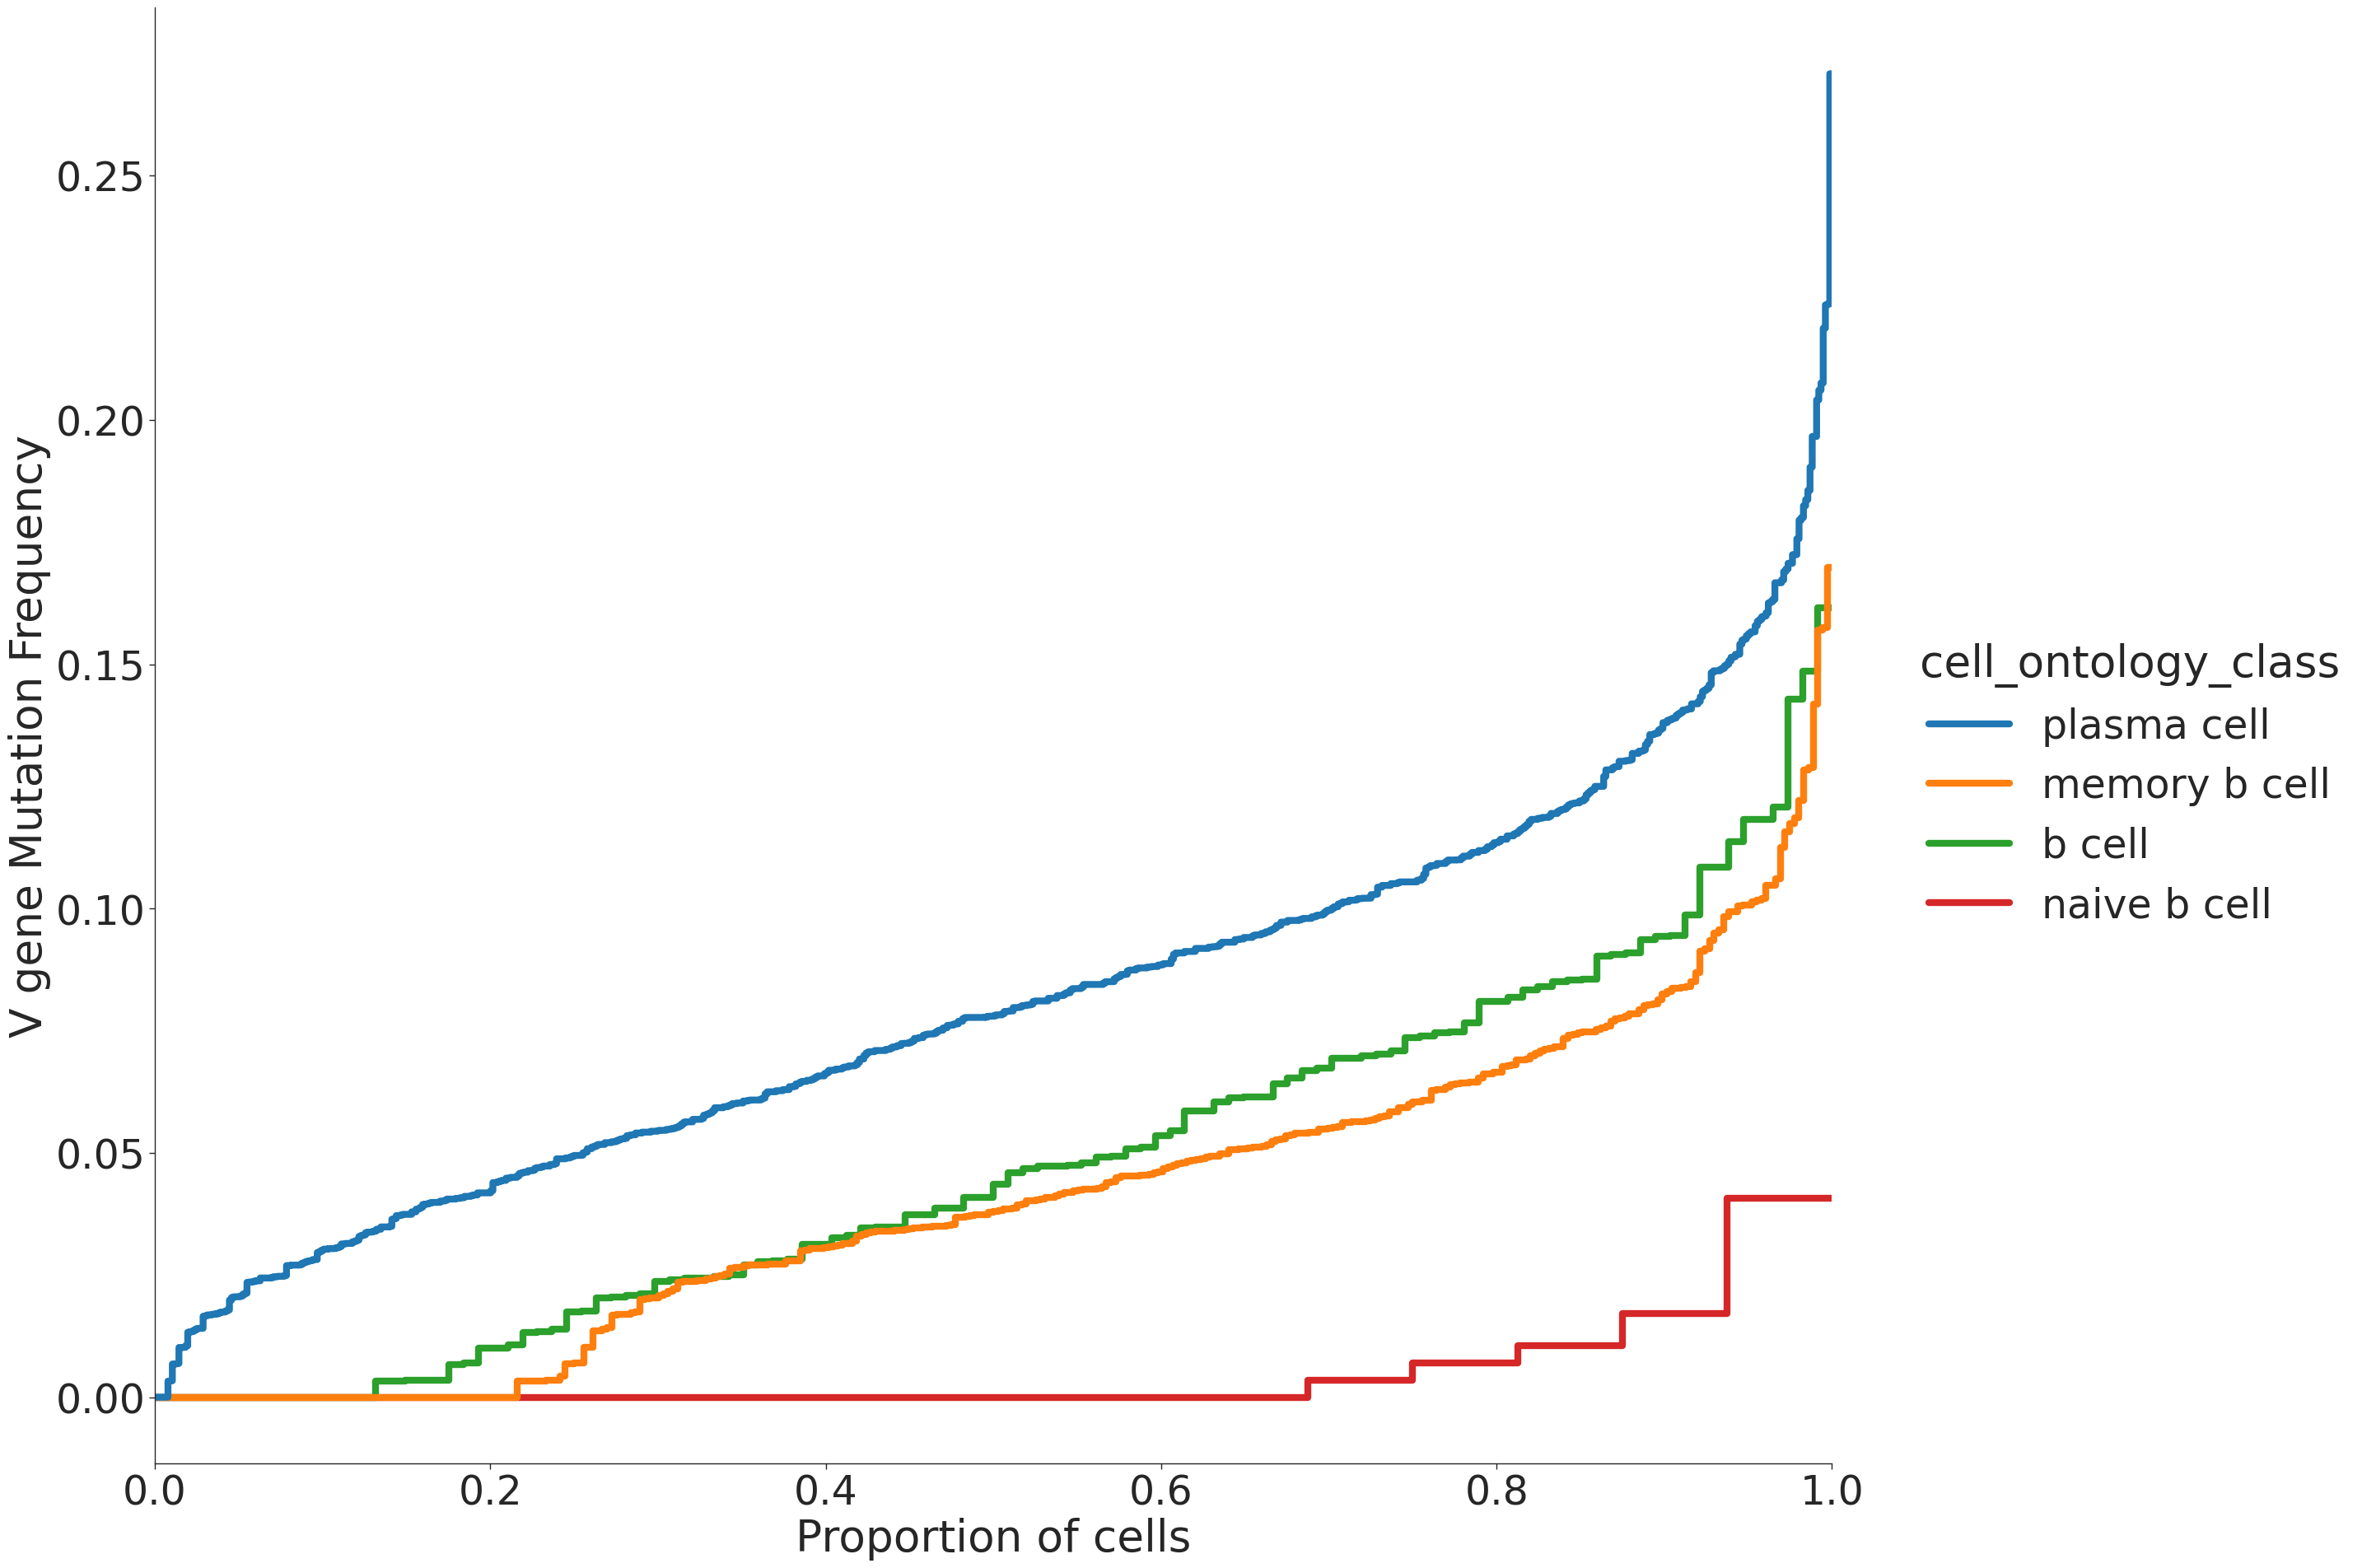

In [99]:
cell_label = 'cell_ontology_class'
bcell_filter = 'b cell|plasma cell'
hue = cell_label
kind = 'ecdf'
mu_freq = 'v_mu_freq'
sel = igh_filtered[hue].value_counts() > 5
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]
data = data[data[cell_label].str.contains(bcell_filter)]
g = sns.displot(data, y = data[x], kind=kind, hue=hue, height=20, aspect=1.2)

g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))
g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')

In [125]:
# calculate means
col = 'cell_ontology_class'
for val in ig[col].unique():
    temp_df = ig[ig[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df.v_mu_freq.mean()))

KeyError: 'cell_ontology_class'

In [120]:
# calculate means
col = 'tissue'
for val in ig[col].unique():
    temp_df = ig[ig[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df.v_mu_freq.mean()))

Bone_Marrow v-mutation-frequency 0.0769483513443073
Fat v-mutation-frequency 0.03941786697442906
Skin v-mutation-frequency 0.05884275868285421
Prostate v-mutation-frequency 0.08607556016756986
Trachea v-mutation-frequency 0.10564852961524798
Liver v-mutation-frequency 0.024023287058060623
Eye v-mutation-frequency 0.0616655478142262
Bladder v-mutation-frequency 0.1283132530120482
Spleen v-mutation-frequency 0.04360516704050456
Lung v-mutation-frequency 0.06548683939905905
Kidney v-mutation-frequency 0.04038609396837487
Muscle v-mutation-frequency 0.03956330600166217


In [122]:
# pseudobulk assemblies

In [146]:
# load
airr = pd.read_table('../../data/snkmk_outs/combined_igblast.airr.tsv')

# filter 
ig = airr[airr.locus == 'IGH']

ig = calculate_v_mu_freq(ig)

ig['tissue'] = ig.sequence_id.str.split('_', expand=True).iloc[:,1]


# correct 10X cellid format
ig.tissue.replace('contig', 'BM', inplace = True)

/home/michaelswift/miniconda3/envs/scirpy/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (93,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-93-de4e25ae2bd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_germline_v'] = df.apply(lambda x: Levenshtein.distance(x.v_sequence_alignment, x.v_germline_alignment), axis=1)
<ipython-input-93-de4e25ae2bd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [147]:
# calculate means
col = 'tissue'
for val in ig[col].unique():
    temp_df = ig[ig[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df.v_mu_freq.mean()))

BM v-mutation-frequency 0.0946126421736044
Fat v-mutation-frequency 0.03864958838672616
Skin v-mutation-frequency 0.08757701057062416
Prostate v-mutation-frequency 0.08843537414965986
Trachea v-mutation-frequency 0.12580618604824126
Liver v-mutation-frequency 0.029515385370367974
Eye v-mutation-frequency 0.07318343412317725
Heart v-mutation-frequency 0.1267605633802817
Bladder v-mutation-frequency 0.1566265060240964
Spleen v-mutation-frequency 0.05402282271600163
Lung v-mutation-frequency 0.07102109086746308
Kidney v-mutation-frequency 0.04398472788235459
Muscle v-mutation-frequency 0.056614834012094294
SI v-mutation-frequency 0.04406207054512139


In [136]:
ig.sequence_id.str.split('_', expand=True).iloc[:,5].value_counts()


vertebralbody    2083
B104856           151
B003956            61
B134041            47
B003959            36
B003957            35
B104860            30
B134048            28
B104854            26
B003958            25
B133910            14
B133819            12
B134046            12
B104881            11
B133900             9
B104877             5
B104862             5
B133829             4
B133833             4
B133903             4
B133831             3
B133830             2
B114853             2
B104855             2
B111652             1
B133907             1
B104867             1
B134703             1
B133897             1
B104866             1
B134704             1
B134035             1
B111654             1
B133915             1
B111739             1
B111653             1
Name: 5, dtype: int64

In [129]:
airr.tissue.value_counts()

contig       8736
LymphNode    2714
BM           2372
Spleen       1596
Blood        1356
             ... 
N7              1
P3              1
M21             1
B7              1
M7              1
Name: tissue, Length: 200, dtype: int64